In [1]:
%reload_ext autoreload
%autoreload 2
sys.path.insert(0, '../../src/')
import pandas as pd
import sys
import data_loader
import re
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib as mpl

In [43]:
seasons = data_loader.load_data(resolve = True, seasons=["2017-18"])

In [63]:
seasons.groupby("GAME_ID").apply(lambda x: x[x["PERSON1TYPE"] == 'HOME_PLAYER']["PLAYER1_TEAM_CITY"].iloc[0])

GAME_ID
21700001        Cleveland
21700002     Golden State
21700003          Detroit
21700004          Indiana
21700005          Orlando
                ...      
21701226      New Orleans
21701227    Oklahoma City
21701228               LA
21701229         Portland
21701230       Sacramento
Length: 1230, dtype: object

In [103]:
seasons.head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,PERSON2TYPE,PERSON3TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_CITY,PLAYER1_TEAM_ID,PLAYER1_TEAM_NICKNAME,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ABBREVIATION,PLAYER2_TEAM_CITY,PLAYER2_TEAM_ID,PLAYER2_TEAM_NICKNAME,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,season_name
0,0,0,PERIOD_BEGIN,2,21700627,NaN,12:00,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:11 PM,2017-18
1,1,0,JUMP_BALL,4,21700627,Jump Ball Barnes vs. Lopez: Tip to Ball,12:00,1,HOME_PLAYER,VISITOR_PLAYER,VISITOR_PLAYER,203084,Harrison Barnes,DAL,Dallas,1.610613e+09,Mavericks,201572,Brook Lopez,LAL,Los Angeles,1.610613e+09,Lakers,1628366,Lonzo Ball,LAL,Los Angeles,1.610613e+09,Lakers,NaN,NaN,NaN,2:11 PM,2017-18
2,2,Hook Shot,FIELD_GOAL_MADE,7,21700627,NaN,11:44,1,VISITOR_PLAYER,VISITOR_PLAYER,0,203944,Julius Randle,LAL,Los Angeles,1.610613e+09,Lakers,1627742,Brandon Ingram,LAL,Los Angeles,1.610613e+09,Lakers,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Randle 10' Hook Shot (2 PTS) (Ingram 1 AST),2:11 PM,2017-18
3,3,Jump Shot,FIELD_GOAL_MADE,9,21700627,Barnes 25' 3PT Jump Shot (3 PTS) (Matthews 1 AST),11:29,1,HOME_PLAYER,HOME_PLAYER,0,203084,Harrison Barnes,DAL,Dallas,1.610613e+09,Mavericks,202083,Wesley Matthews,DAL,Dallas,1.610613e+09,Mavericks,0,NaN,NaN,NaN,NaN,NaN,2 - 3,1,NaN,2:11 PM,2017-18
4,4,Fadeaway Jumper,FIELD_GOAL_MADE,12,21700627,NaN,11:12,1,VISITOR_PLAYER,VISITOR_PLAYER,0,1627742,Brandon Ingram,LAL,Los Angeles,1.610613e+09,Lakers,1628366,Lonzo Ball,LAL,Los Angeles,1.610613e+09,Lakers,0,NaN,NaN,NaN,NaN,NaN,4 - 3,-1,Ingram 13' Fadeaway Jumper (2 PTS) (Ball 1 AST),2:12 PM,2017-18


Text(0, 0.5, 'Count')

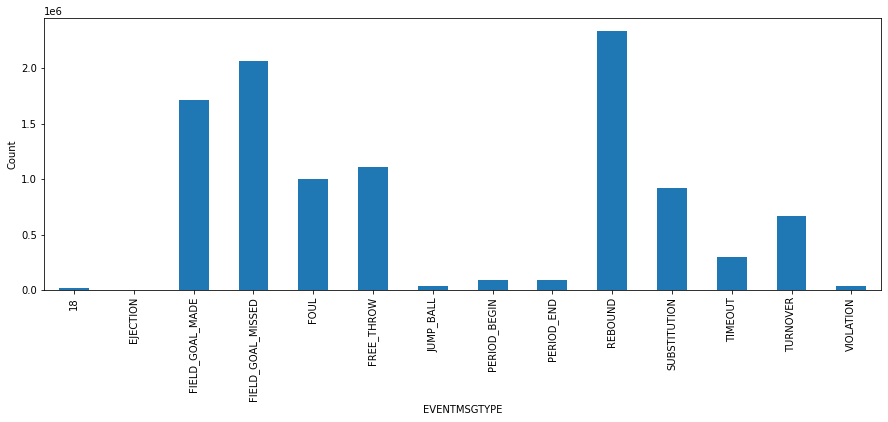

In [7]:
ax = seasons.groupby("EVENTMSGTYPE").size().plot.bar(logy=False,figsize=(15,5))
ax.set_ylabel("Count")

In [27]:
seasons[seasons["HOMEDESCRIPTION"].str.contains("Mason Jr. 25' 3PT", na=False)].head(30)["HOMEDESCRIPTION"][1242234]

"Mason Jr. 25' 3PT Jump Shot (3 PTS) (Williams 7 AST)"

Text(0, 0.5, 'Count')

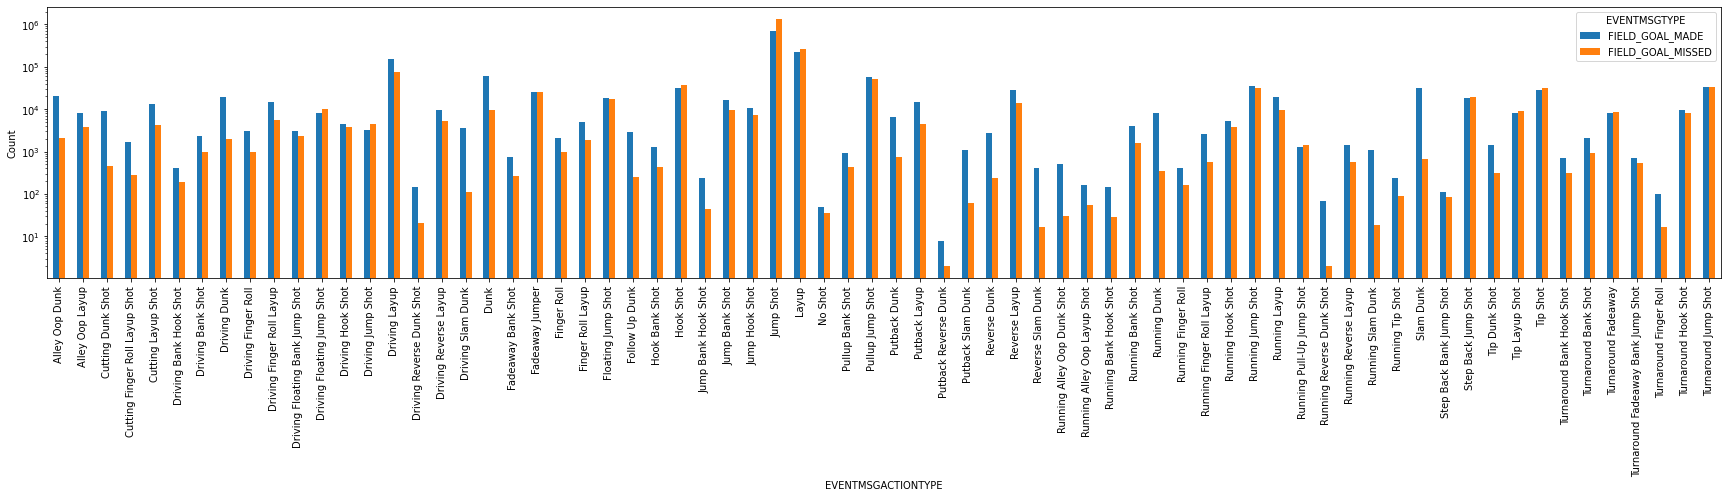

In [30]:
ax = seasons[seasons["EVENTMSGTYPE"].isin(["FIELD_GOAL_MADE","FIELD_GOAL_MISSED"])].groupby(["EVENTMSGTYPE","EVENTMSGACTIONTYPE"]).size().unstack("EVENTMSGTYPE").plot.bar(logy = True, figsize=(30,5))
ax.set_ylabel("Count")

<AxesSubplot:xlabel='PERIOD'>

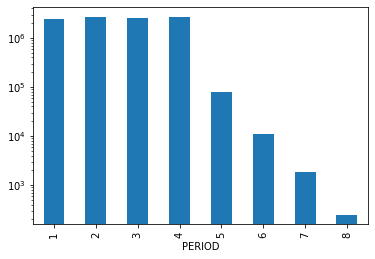

In [32]:
seasons.groupby("PERIOD").size().plot.bar(logy=True)

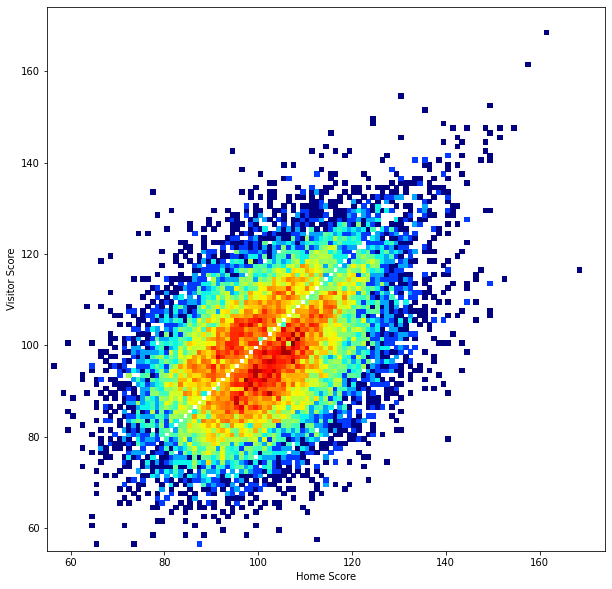

In [30]:
#Log-Scale Score heat map 
#seasons[["away_score","home_score"]] = seasons["SCORE"].str.split(" - ",expand=True)
#seasons["points_scored"] = seasons["away_score"].astype(float) + seasons["home_score"].astype(float)
final_scores = seasons.iloc[seasons.groupby("GAME_ID")["points_scored"].idxmax()][["home_score","away_score"]]
plt.figure(figsize=(10, 10))
plt.hist2d(final_scores["home_score"].astype(int), final_scores["away_score"].astype(int), bins=range(55, 175 1), cmap=plt.cm.jet, norm=mpl.colors.LogNorm())
plt.xlabel("Home Score")
plt.ylabel("Visitor Score")
plt.show()

In [13]:
seasons.groupby("PERSON3TYPE").size()

PERSON3TYPE
0                 8862455
HOME_PLAYER        138457
HOME_TEAM            1044
TIMEOUT           1262351
VISITOR_PLAYER     124495
VISITOR_TEAM          953
dtype: int64

Text(0, 0.5, 'Nr. of games')

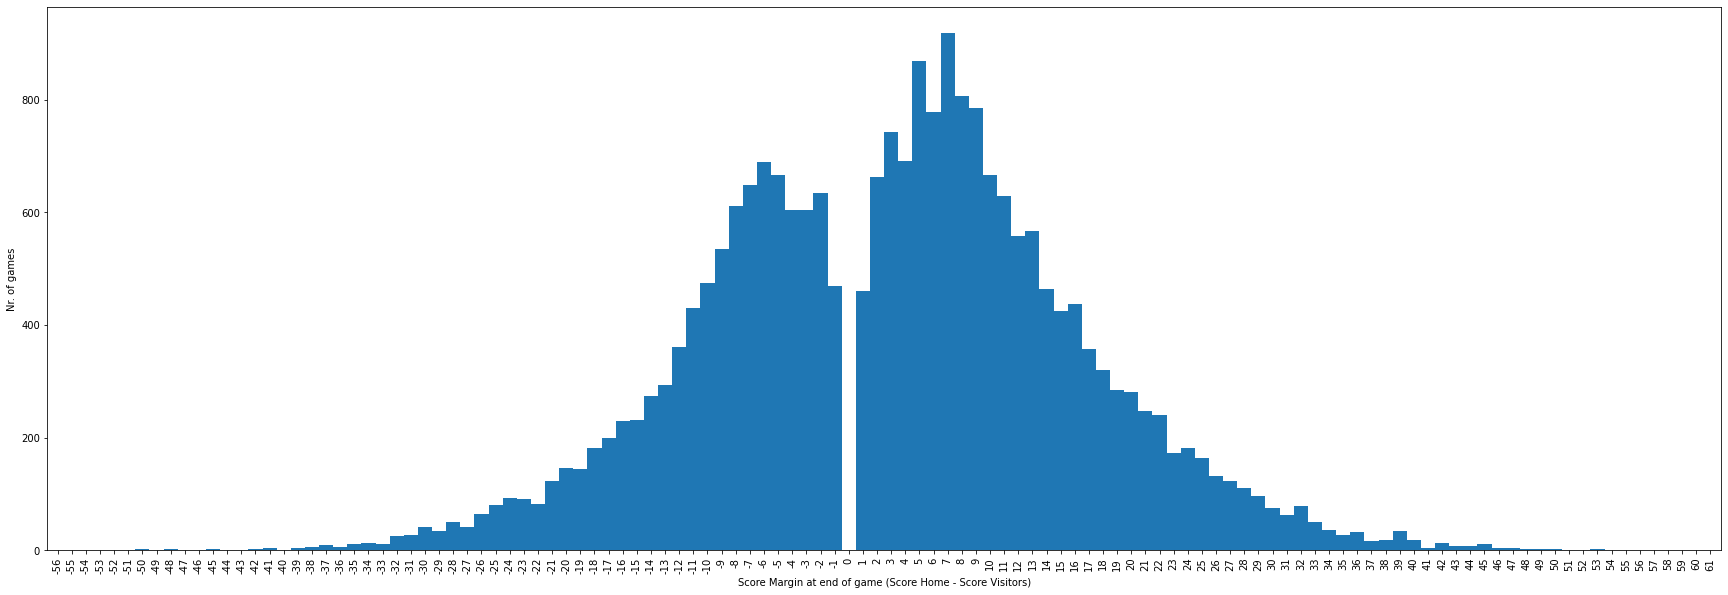

In [28]:
score_margin = seasons[~seasons["SCOREMARGIN"].isna()].groupby("GAME_ID")["SCOREMARGIN"].last().astype(int).value_counts()
score_margin = score_margin.reindex(list(range(score_margin.index.min(),score_margin.index.max()+1)),fill_value=0)
ax = score_margin.sort_index().plot.bar(figsize=(30,10), width=1)
ax.set_xlabel("Score Margin at end of game (Score Home - Score Visitors)")
ax.set_ylabel("Nr. of games")

Text(0, 0.5, 'Play Counts')

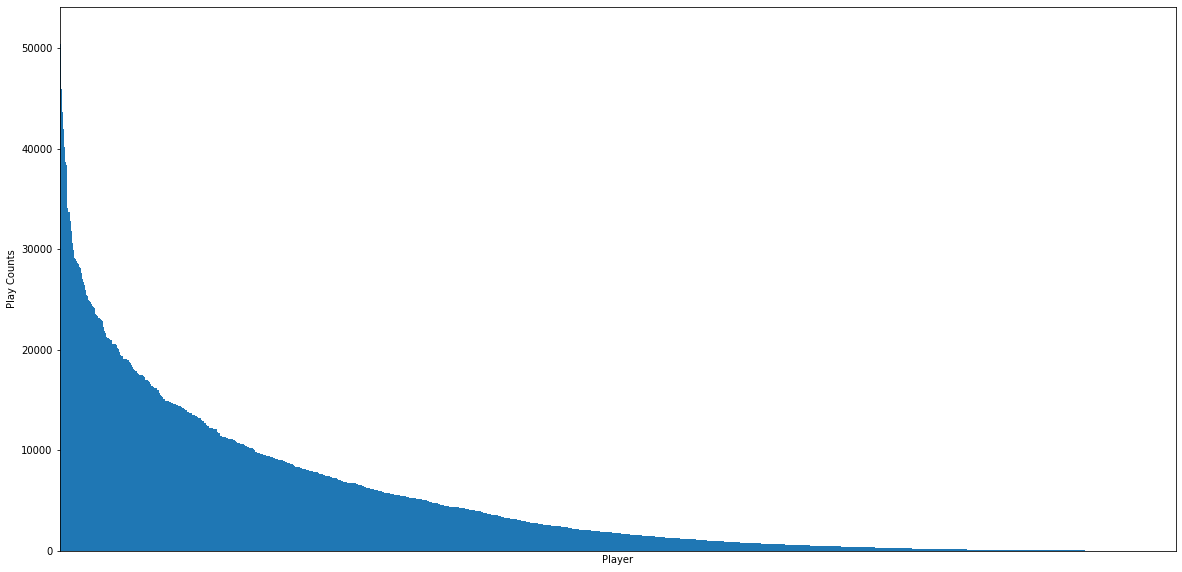

In [26]:
#Number of plays as PLAYER1_NAME per player
player_plays = seasons[seasons["PERSON1TYPE"].isin(["HOME_PLAYER","VISITOR_PLAYER"])].groupby("PLAYER1_ID").size().sort_values(ascending=False)
ax = player_plays.plot.bar(figsize=(20, 10), width=1, xticks=[], logy=False)
ax.set_xlabel("Player")
ax.set_ylabel("Play Counts")

In [25]:
seasons[seasons["PERSON1TYPE"].isin(["HOME_PLAYER","VISITOR_PLAYER"])].nunique()

Unnamed: 0                       704
EVENTMSGACTIONTYPE               129
EVENTMSGTYPE                      11
EVENTNUM                         969
GAME_ID                        22965
HOMEDESCRIPTION              1323238
PCTIMESTRING                     721
PERIOD                             8
PERSON1TYPE                        2
PERSON2TYPE                        6
PERSON3TYPE                        6
PLAYER1_ID                      1874
PLAYER1_NAME                    1844
PLAYER1_TEAM_ABBREVIATION         36
PLAYER1_TEAM_CITY                 34
PLAYER1_TEAM_ID                   30
PLAYER1_TEAM_NICKNAME             32
PLAYER2_ID                      1863
PLAYER2_NAME                    1851
PLAYER2_TEAM_ABBREVIATION         36
PLAYER2_TEAM_CITY                 34
PLAYER2_TEAM_ID                   30
PLAYER2_TEAM_NICKNAME             32
PLAYER3_ID                      1696
PLAYER3_NAME                    1666
PLAYER3_TEAM_ABBREVIATION         36
PLAYER3_TEAM_CITY                 34
P